In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install pdpbox
!pip install shap
!pip install category_encoders
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 34.0 MB 89 kB/s 
     |████████████████████████████████| 37.8 MB 126 kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=b4c5e6f97998449fc8f77f5f8e679e34680fdf8756b5f78faa4184c3f5613b78
  Stored in directory: /root/.cache/pip/wheels/35/fb/ef/a08dd2a1611435285fa3f9d9104bf554f10c2eb7293b526ccb
  Created wheel for matplotlib: filename=matplotlib-3.1.1-cp38-cp38-linux_x86_64.whl size=11152156 sha256=ebe2b8f2f7ca551c7f8a2ccf3ecb804ddd26909acf8d05d0338aebe7953d25a6
  Stored in directory: /root/.cache/pip/wheels/85/86/f1/054e7477b5e68f3c4a1258d12ae1c2205d6889283ce631dfe5
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=9197eb93faa10f2d0f500b7203be6e50a3d48de6d39cfe1a707d969f91be07af
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 4.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 757 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 4.1 MB/s 
     |████████████████████████████████| 133 kB 52.7 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=d1eeef90d5fbf5ba2c685ef8cd8c09364448f285ca4612abed477946e990778b
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
filename = '/content/drive/MyDrive/1/Sales.csv'

In [5]:
df = pd.read_csv(filename,encoding='cp1252')
df.head()

,index,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,...,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE
0,0,2354,124,11986.54,96.67,529.59,4.27,2016-12-30,2021-10-24,14.19,...,2592.18,2409.71,12,61,37,14,1067.92,5674.65,3916.53,1327.44
1,1,2361,82,11025.96,134.46,97.92,1.19,2018-03-31,2021-10-24,15.89,...,2807.66,4106.19,1,13,24,44,30.25,3143.69,2205.47,5646.55
2,2,2415,43,7259.69,168.83,171.69,3.99,2017-11-30,2021-10-24,33.12,...,713.94,2861.90,0,6,12,25,0.00,707.98,2560.91,3990.80
3,3,2427,44,6992.27,158.92,92.82,2.11,2019-04-09,2021-10-24,21.11,...,997.02,1260.08,0,10,13,21,0.00,1908.99,2025.05,3058.23
4,4,2456,55,6263.44,113.88,179.04,3.26,2020-10-23,2021-10-24,6.65,...,2725.66,768.46,6,9,27,13,501.34,1197.83,3004.77,1559.50


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      5000 non-null   int64  
 1   CustomerID                 5000 non-null   int64  
 2   TOTAL_ORDERS               5000 non-null   int64  
 3   REVENUE                    5000 non-null   float64
 4   AVERAGE_ORDER_VALUE        5000 non-null   float64
 5   CARRIAGE_REVENUE           5000 non-null   float64
 6   AVERAGESHIPPING            5000 non-null   float64
 7   FIRST_ORDER_DATE           5000 non-null   object 
 8   LATEST_ORDER_DATE          5000 non-null   object 
 9   AVGDAYSBETWEENORDERS       5000 non-null   float64
 10  DAYSSINCELASTORDER         5000 non-null   int64  
 11  MONDAY_ORDERS              5000 non-null   int64  
 12  TUESDAY_ORDERS             5000 non-null   int64  
 13  WEDNESDAY_ORDERS           5000 non-null   int64

In [7]:
cleaned_data = df[['CustomerID','TOTAL_ORDERS','REVENUE','LATEST_ORDER_DATE','AVGDAYSBETWEENORDERS','DAYSSINCELASTORDER']]
cleaned_data

,CustomerID,TOTAL_ORDERS,REVENUE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER
0,2354,124,11986.54,2021-10-24,14.19,1
1,2361,82,11025.96,2021-10-24,15.89,1
2,2415,43,7259.69,2021-10-24,33.12,1
3,2427,44,6992.27,2021-10-24,21.11,1
4,2456,55,6263.44,2021-10-24,6.65,1
...,...,...,...,...,...,...
4995,176278,1,117.49,2021-04-01,0.00,207
4996,176319,1,117.49,2021-04-01,0.00,207
4997,176336,1,117.49,2021-04-01,0.00,207
4998,176370,1,117.49,2021-04-01,0.00,207


In [8]:
rfm = df[['CustomerID','REVENUE','AVGDAYSBETWEENORDERS','DAYSSINCELASTORDER']]

rfm.rename(columns={ 'AVGDAYSBETWEENORDERS': 'Frequency', 
                     'DAYSSINCELASTORDER': 'Recency',
                     'REVENUE': 'Monetary'}, inplace=True);

rfm = rfm.set_index('CustomerID')
rfm

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Monetary,Frequency,Recency
CustomerID,,,
2354,11986.54,14.19,1
2361,11025.96,15.89,1
2415,7259.69,33.12,1
2427,6992.27,21.11,1
2456,6263.44,6.65,1
...,...,...,...
176278,117.49,0.00,207
176319,117.49,0.00,207
176336,117.49,0.00,207


In [9]:
Rlabel = range(4,0,-1)
Flabel = range(4,0,-1)
Mlabel = range(1,5)

Rgrp = pd.qcut(rfm['Recency'],q=4,labels=Rlabel)
Fgrp = pd.qcut(rfm['Frequency'],q=4,labels=Flabel)
Mgrp = pd.qcut(rfm['Monetary'],q=4,labels=Mlabel)

rfm['R'] = Rgrp.values
rfm['F'] = Fgrp.values
rfm['M'] = Mgrp.values

rfm['rfmScore'] = rfm[['R','F','M']].sum(axis=1)
rfm['rf'] = rfm[['R','F']].sum(axis=1)
rfm['fm'] = rfm[['M','F']].sum(axis=1)
rfm

,Monetary,Frequency,Recency,R,F,M,rfmScore,rf,fm
CustomerID,,,,,,,,,
2354,11986.54,14.19,1,4,4,4,12,8.0,8
2361,11025.96,15.89,1,4,4,4,12,8.0,8
2415,7259.69,33.12,1,4,3,4,11,7.0,7
2427,6992.27,21.11,1,4,4,4,12,8.0,8
2456,6263.44,6.65,1,4,4,4,12,8.0,8
...,...,...,...,...,...,...,...,...,...
176278,117.49,0.00,207,1,4,1,6,5.0,5
176319,117.49,0.00,207,1,4,1,6,5.0,5
176336,117.49,0.00,207,1,4,1,6,5.0,5


In [10]:
def vip(data):
  if data >= 10:
    return 'VIP 4'
  elif data< 10 and data>=8:
    return 'VIP 3'
  elif data<8 and data>=6:
    return 'VIP 2'
  else:
    return 'VIP 1'

# def next(df):
#   if df['Recency'] > 150:
#     return 0
#   else:
#     if df['Frequency'] !=0:
#       if df['TOTAL_ORDERS']>1:
#         return 30/df['Frequency']*df['AVERAGE_ORDER_VALUE']
#       else
#         return df['AVERAGE_ORDER_VALUE']/df['Frequency']
#     else:
#       return df['AVERAGE_ORDER_VALUE']
# def next(df):
#   if df['Recency'] > 180:
#     return 0
#   else:
#     if df['diff']>30:
#       if df['Frequency'] !=0:
#         return 30/df['Frequency']*df['AVERAGE_ORDER_VALUE']
#       else:
#         return 30*df['AVERAGE_ORDER_VALUE']
#     else:
#       return df['Monetary']
def next(df):
  if df['diff']>30:
    if df['Frequency'] !=0:
      return 30/df['Frequency']*df['AVERAGE_ORDER_VALUE']
    else:
      return 30*df['AVERAGE_ORDER_VALUE']
  else:
    return df['Monetary']

def churn(df):
  if df['Recency']>170:
    return 'Churn'
  # elif df['Recency']<=10:
  #   return 'Regular'
  else:
    return 'None'

In [11]:
rfm['VIP'] = rfm['rfmScore'].apply(vip)
rfm

,Monetary,Frequency,Recency,R,F,M,rfmScore,rf,fm,VIP
CustomerID,,,,,,,,,,
2354,11986.54,14.19,1,4,4,4,12,8.0,8,VIP 4
2361,11025.96,15.89,1,4,4,4,12,8.0,8,VIP 4
2415,7259.69,33.12,1,4,3,4,11,7.0,7,VIP 4
2427,6992.27,21.11,1,4,4,4,12,8.0,8,VIP 4
2456,6263.44,6.65,1,4,4,4,12,8.0,8,VIP 4
...,...,...,...,...,...,...,...,...,...,...
176278,117.49,0.00,207,1,4,1,6,5.0,5,VIP 2
176319,117.49,0.00,207,1,4,1,6,5.0,5,VIP 2
176336,117.49,0.00,207,1,4,1,6,5.0,5,VIP 2


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


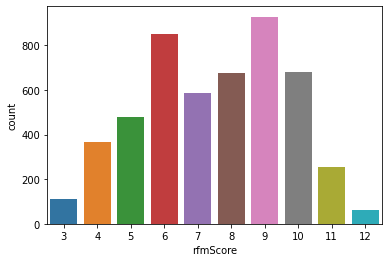

In [12]:
sns.countplot(rfm['rfmScore'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


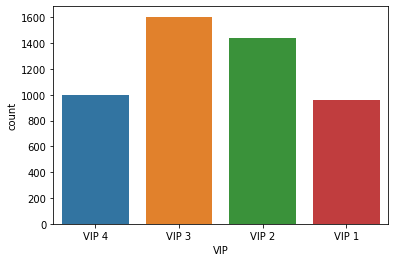

In [13]:
sns.countplot(rfm['VIP'])

In [14]:
merged = pd.merge(df,rfm,on='CustomerID',how='left')


In [15]:
merged['FIRST_ORDER_DATE'] = pd.to_datetime(merged['FIRST_ORDER_DATE'])
merged['LATEST_ORDER_DATE'] = pd.to_datetime(merged['LATEST_ORDER_DATE'])

In [16]:
merged['diff'] = merged.LATEST_ORDER_DATE - merged.FIRST_ORDER_DATE
merged['diff'] = merged['diff'].dt.days


In [17]:
merged['NextSpend'] = merged.apply(next,axis=1)

In [18]:
#baseline 112.89721031949637
merged['NextSpend'].mean()

112.89721031949637

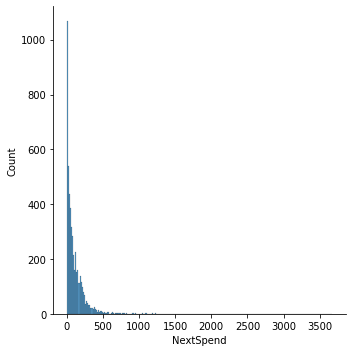

In [19]:
sns.displot(merged['NextSpend'])

In [20]:
#Outlier
merged = merged[merged['NextSpend']<=np.percentile(merged['NextSpend'],99)]

In [21]:
merged['NextSpend'].max()

740.0904977375566

In [22]:
merged.sort_values(by='FIRST_ORDER_DATE')

,index,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,...,Recency,R,F,M,rfmScore,rf,fm,VIP,diff,NextSpend
1151,1151,112467,4,206.45,51.61,4.95,1.24,2014-02-01,2021-10-21,704.75,...,4,4,1,1,6,5.0,2,VIP 2,2819,2.196949
3192,3192,7516,11,1549.02,140.82,13.97,1.27,2014-02-01,2021-07-01,246.09,...,116,2,1,3,6,3.0,4,VIP 2,2707,17.166890
3518,3518,2410,31,7438.61,239.96,92.81,2.99,2014-02-02,2021-06-04,86.42,...,143,2,2,4,8,4.0,6,VIP 3,2679,83.300162
3682,3682,29466,8,652.10,81.51,28.90,3.61,2014-02-02,2021-05-15,332.38,...,163,2,1,2,5,3.0,3,VIP 1,2659,7.356941
4019,4019,9639,16,1326.33,82.90,23.88,1.49,2014-02-02,2021-04-01,163.44,...,207,1,2,3,6,3.0,5,VIP 2,2615,15.216593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,973,116062,2,200.00,100.00,0.00,0.00,2021-10-24,2021-10-24,0.00,...,1,4,4,1,9,8.0,5,VIP 3,0,200.000000
348,348,30540,6,636.65,106.11,0.00,0.00,2021-10-24,2021-10-24,0.00,...,1,4,4,2,10,8.0,6,VIP 4,0,636.650000
975,975,116217,1,199.99,199.99,4.99,4.99,2021-10-24,2021-10-24,0.00,...,1,4,4,1,9,8.0,5,VIP 3,0,199.990000
969,969,115013,2,201.56,100.78,7.56,3.78,2021-10-24,2021-10-24,0.00,...,1,4,4,1,9,8.0,5,VIP 3,0,201.560000


In [23]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4950 entries, 0 to 4999
Data columns (total 53 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   index                      4950 non-null   int64         
 1   CustomerID                 4950 non-null   int64         
 2   TOTAL_ORDERS               4950 non-null   int64         
 3   REVENUE                    4950 non-null   float64       
 4   AVERAGE_ORDER_VALUE        4950 non-null   float64       
 5   CARRIAGE_REVENUE           4950 non-null   float64       
 6   AVERAGESHIPPING            4950 non-null   float64       
 7   FIRST_ORDER_DATE           4950 non-null   datetime64[ns]
 8   LATEST_ORDER_DATE          4950 non-null   datetime64[ns]
 9   AVGDAYSBETWEENORDERS       4950 non-null   float64       
 10  DAYSSINCELASTORDER         4950 non-null   int64         
 11  MONDAY_ORDERS              4950 non-null   int64         
 12  TUESDA

In [24]:
#feature selection
final = merged.drop(['REVENUE','AVGDAYSBETWEENORDERS','DAYSSINCELASTORDER','VIP','index','CustomerID','Frequency','AVERAGE_ORDER_VALUE','Monetary','FIRST_ORDER_DATE','LATEST_ORDER_DATE','R','F','M','diff','fm','rfmScore'],axis=1)

In [25]:
#feature target
target = 'NextSpend'
X = final.drop(columns=target)
y = final[target]

In [26]:
#train test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [27]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4950 entries, 0 to 4999
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   TOTAL_ORDERS               4950 non-null   int64  
 1   CARRIAGE_REVENUE           4950 non-null   float64
 2   AVERAGESHIPPING            4950 non-null   float64
 3   MONDAY_ORDERS              4950 non-null   int64  
 4   TUESDAY_ORDERS             4950 non-null   int64  
 5   WEDNESDAY_ORDERS           4950 non-null   int64  
 6   THURSDAY_ORDERS            4950 non-null   int64  
 7   FRIDAY_ORDERS              4950 non-null   int64  
 8   SATURDAY_ORDERS            4950 non-null   int64  
 9   SUNDAY_ORDERS              4950 non-null   int64  
 10  MONDAY_REVENUE             4950 non-null   float64
 11  TUESDAY_REVENUE            4950 non-null   float64
 12  WEDNESDAY_REVENUE          4950 non-null   float64
 13  THURSDAY_REVENUE           4950 non-null   float

In [28]:
from category_encoders import OrdinalEncoder
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor, XGBClassifier

import eli5
from eli5.sklearn import PermutationImportance

In [29]:
# tt = TransformedTargetRegressor(regressor=pipe,func=np.log1p, inverse_func=np.expm1)

In [30]:
# pipe = Pipeline([('encoder', OrdinalEncoder()),('model',TransformedTargetRegressor(regressor=XGBRegressor(),func=np.log1p, inverse_func=np.expm1))])

# grid_params = {
#  'model__regressor__n_estimators': [ 500, 1000 ],
#  "model__regressor__learning_rate"    : [ 0.02, 0.05 ] ,
#  "model__regressor__max_depth"        : [ 3, 5 ],
#  "model__regressor__min_child_weight" : [ 2, 4 ],
#  "model__regressor__gamma"            : [ 0.05 ],
#  'model__regressor__subsample' : [ 0.6, 0.8 ]}

# clf = RandomizedSearchCV(
#     pipe,
#     param_distributions = grid_params,
#     verbose = 1,
#     n_iter=7,
#     cv = 3,
#     scoring='r2',
#     n_jobs = -1
#     )

# results = clf.fit(X_train,y_train)

In [31]:
# preprocessor = OrdinalEncoder()

# estimator = TransformedTargetRegressor(
#     regressor=XGBRegressor(),
#     func=np.log1p,
#     inverse_func=np.expm1
# )

# clf = RandomizedSearchCV(
#     estimator,
#     param_distributions = grid_params,
#     cv=5,
#     scoring='r2',
#     verbose=1,
#     n_iter=7,
#     n_jobs=-1
# )

# grid_params = {
#  'model__regressor__n_estimators': [ 500, 1000 ],
#  "model__regressor__learning_rate"    : [ 0.02, 0.05 ] ,
#  "model__regressor__max_depth"        : [ 3, 5 ],
#  "model__regressor__min_child_weight" : [ 2, 4 ],
#  "model__regressor__gamma"            : [ 0.05 ],
#  'model__regressor__subsample' : [ 0.6, 0.8 ]}

# pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('randomsearchcv', clf)
# ])

# # fit the pipeline
# results = pipeline.fit(X_train,y_train)


In [32]:
tt = TransformedTargetRegressor(regressor=XGBRegressor(),func=np.log1p, inverse_func=np.expm1)

grid_params = {
 'regressor__n_estimators': [ 500, 1000 ],
 "regressor__learning_rate"    : [ 0.02, 0.05 ] ,
 "regressor__max_depth"        : [ 3, 5 ],
 "regressor__min_child_weight" : [ 2, 4 ],
 }

clf = RandomizedSearchCV(
    tt,
    param_distributions = grid_params,
    verbose = 1,
    n_iter=6,
    cv = 4,
    scoring='neg_root_mean_squared_error',
    n_jobs = -1
    )

results = clf.fit(X_train,y_train)

Fitting 4 folds for each of 6 candidates, totalling 24 fits
[07:54:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


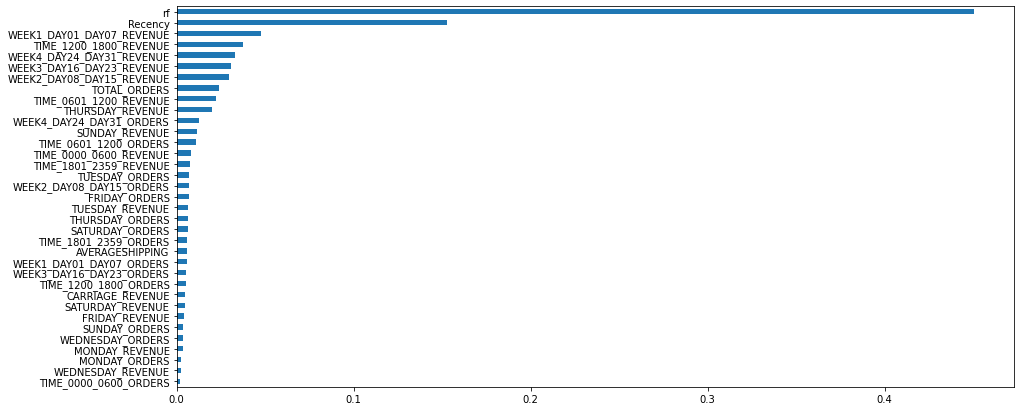

In [33]:
importances = pd.Series(results.best_estimator_.regressor_.feature_importances_,X_train.columns)
plt.figure(figsize=(15,7))
importances.sort_values().plot.barh();

In [34]:
#RMSE
results.best_score_

-43.62744681025238

In [35]:
from pdpbox.pdp import pdp_isolate, pdp_plot

isolated = pdp_isolate(
    model = results.best_estimator_.regressor_,
    dataset = X_test,
    model_features = X_test.columns,
    feature = 'rf',
    num_grid_points= 30
)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f791d2ba8e0>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f791d2b2bb0>})

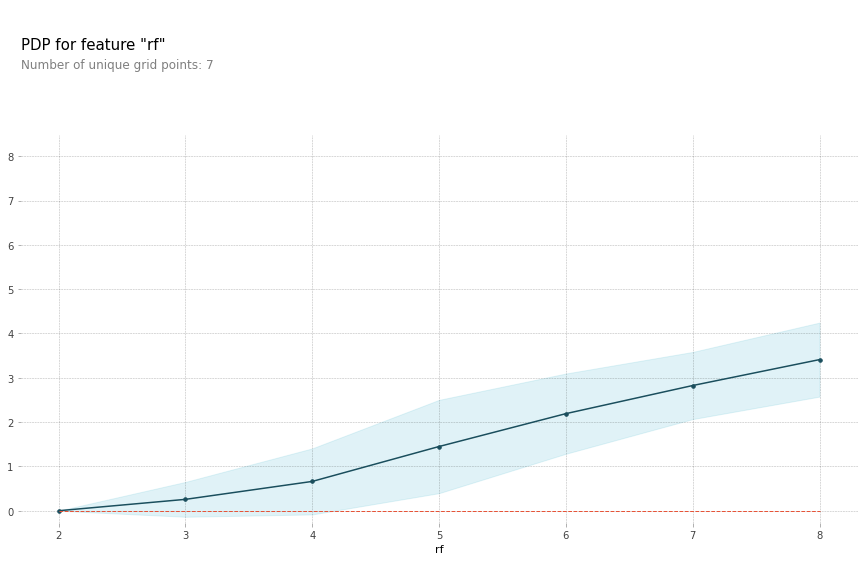

In [36]:
pdp_plot(isolated,feature_name='rf')


In [37]:
isolated = pdp_isolate(
    model = results.best_estimator_.regressor_,
    dataset = X_test,
    model_features = X_test.columns,
    feature = 'Recency',
    num_grid_points= 30
)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f791d23b820>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f791d1f5070>})

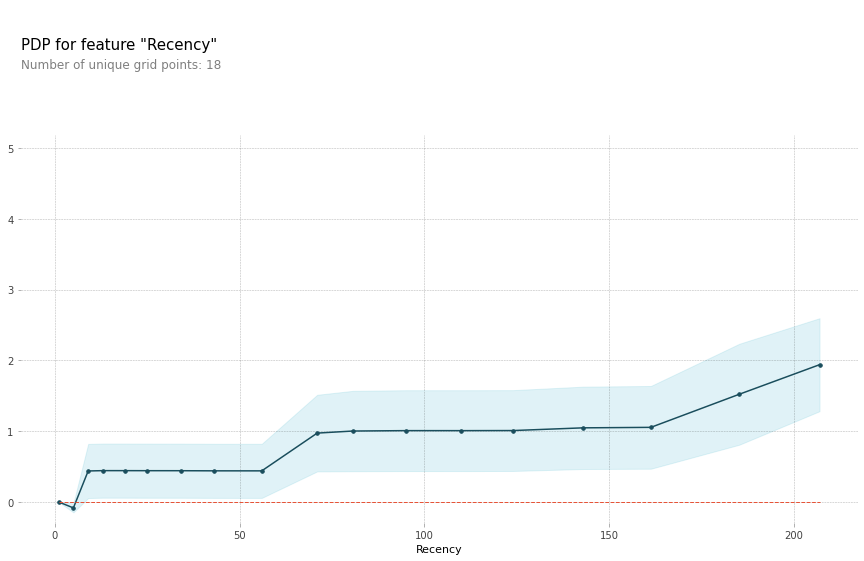

In [38]:
pdp_plot(isolated,feature_name='Recency')

In [39]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4950 entries, 0 to 4999
Data columns (total 53 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   index                      4950 non-null   int64         
 1   CustomerID                 4950 non-null   int64         
 2   TOTAL_ORDERS               4950 non-null   int64         
 3   REVENUE                    4950 non-null   float64       
 4   AVERAGE_ORDER_VALUE        4950 non-null   float64       
 5   CARRIAGE_REVENUE           4950 non-null   float64       
 6   AVERAGESHIPPING            4950 non-null   float64       
 7   FIRST_ORDER_DATE           4950 non-null   datetime64[ns]
 8   LATEST_ORDER_DATE          4950 non-null   datetime64[ns]
 9   AVGDAYSBETWEENORDERS       4950 non-null   float64       
 10  DAYSSINCELASTORDER         4950 non-null   int64         
 11  MONDAY_ORDERS              4950 non-null   int64         
 12  TUESDA

In [40]:
merged2 = pd.merge(df,rfm,on='CustomerID',how='left')

In [41]:
merged2['churn'] = merged2.apply(churn,axis=1)
merged2

,index,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,...,Frequency,Recency,R,F,M,rfmScore,rf,fm,VIP,churn
0,0,2354,124,11986.54,96.67,529.59,4.27,2016-12-30,2021-10-24,14.19,...,14.19,1,4,4,4,12,8.0,8,VIP 4,None
1,1,2361,82,11025.96,134.46,97.92,1.19,2018-03-31,2021-10-24,15.89,...,15.89,1,4,4,4,12,8.0,8,VIP 4,None
2,2,2415,43,7259.69,168.83,171.69,3.99,2017-11-30,2021-10-24,33.12,...,33.12,1,4,3,4,11,7.0,7,VIP 4,None
3,3,2427,44,6992.27,158.92,92.82,2.11,2019-04-09,2021-10-24,21.11,...,21.11,1,4,4,4,12,8.0,8,VIP 4,None
4,4,2456,55,6263.44,113.88,179.04,3.26,2020-10-23,2021-10-24,6.65,...,6.65,1,4,4,4,12,8.0,8,VIP 4,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,176278,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.00,...,0.00,207,1,4,1,6,5.0,5,VIP 2,Churn
4996,4996,176319,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.00,...,0.00,207,1,4,1,6,5.0,5,VIP 2,Churn
4997,4997,176336,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.00,...,0.00,207,1,4,1,6,5.0,5,VIP 2,Churn
4998,4998,176370,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.00,...,0.00,207,1,4,1,6,5.0,5,VIP 2,Churn


In [42]:
final2 = merged2.drop(['REVENUE','AVGDAYSBETWEENORDERS','DAYSSINCELASTORDER','index','CustomerID','AVERAGE_ORDER_VALUE','FIRST_ORDER_DATE','LATEST_ORDER_DATE','R','rfmScore','Recency','rf','VIP','fm'],axis=1)

In [43]:
final2.head()

,TOTAL_ORDERS,CARRIAGE_REVENUE,AVERAGESHIPPING,MONDAY_ORDERS,TUESDAY_ORDERS,WEDNESDAY_ORDERS,THURSDAY_ORDERS,FRIDAY_ORDERS,SATURDAY_ORDERS,SUNDAY_ORDERS,...,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE,Monetary,Frequency,F,M,churn
0,124,529.59,4.27,13,13,29,25,19,15,10,...,14,1067.92,5674.65,3916.53,1327.44,11986.54,14.19,4,4,None
1,82,97.92,1.19,11,13,10,13,14,10,11,...,44,30.25,3143.69,2205.47,5646.55,11025.96,15.89,4,4,None
2,43,171.69,3.99,5,4,3,5,5,8,13,...,25,0.00,707.98,2560.91,3990.80,7259.69,33.12,3,4,None
3,44,92.82,2.11,10,8,5,8,5,3,5,...,21,0.00,1908.99,2025.05,3058.23,6992.27,21.11,4,4,None
4,55,179.04,3.26,2,3,8,8,12,10,12,...,13,501.34,1197.83,3004.77,1559.50,6263.44,6.65,4,4,None


In [44]:
target = 'churn'
X2 = final2.drop(columns=target)
y2 = final2[target]

In [45]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.2, random_state=2)

In [46]:
len(y2_train[y2_train == 'None'])/len(y2_train)

0.74925

In [47]:
major = y2_train.mode()[0]
y2_pred = [major]*len(y2_train)

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y2_train,y2_pred)

0.74925

In [49]:
dists = {  
    'xgbclassifier__max_depth': [5, 10, 15, None], 
    'xgbclassifier__learning_rate' : [0.05,0.10,0.15,0.20,0.25,0.30]
}

pipeline = make_pipeline(
        OrdinalEncoder(),
        XGBClassifier(n_estimators = 200,
                      random_state=2,
                      n_jobs=-1,
                      max_depth=7,
                      learning_rate=0.2
                      )
    )
    
clf2 = RandomizedSearchCV(
pipeline, 
param_distributions=dists, 
n_iter=6, 
cv=4, 
scoring='roc_auc',  
verbose=1,
n_jobs=-1
)


clf2.fit(X2_train, y2_train)

Fitting 4 folds for each of 6 candidates, totalling 24 fits


RandomizedSearchCV(cv=4,
                   estimator=Pipeline(steps=[('ordinalencoder',
                                              OrdinalEncoder()),
                                             ('xgbclassifier',
                                              XGBClassifier(learning_rate=0.2,
                                                            max_depth=7,
                                                            n_estimators=200,
                                                            n_jobs=-1,
                                                            random_state=2))]),
                   n_iter=6, n_jobs=-1,
                   param_distributions={'xgbclassifier__learning_rate': [0.05,
                                                                         0.1,
                                                                         0.15,
                                                                         0.2,
                                                

In [50]:
clf2.best_estimator_[0]

OrdinalEncoder(cols=['F', 'M'],
               mapping=[{'col': 'F',
                         'data_type': CategoricalDtype(categories=range(4, 0, -1), ordered=True),
                         'mapping': 4.0    1
3.0    2
2.0    3
1.0    4
NaN   -2
dtype: int64},
                        {'col': 'M',
                         'data_type': CategoricalDtype(categories=range(1, 5), ordered=True),
                         'mapping': 1.0    1
2.0    2
3.0    3
4.0    4
NaN   -2
dtype: int64}])

In [51]:
#roc_auc
clf2.best_score_

0.92319831393784

In [52]:
permuter = PermutationImportance(
    clf2.best_estimator_._final_estimator,
    scoring='accuracy',
    n_iter=5,
    random_state=2
)

X2_test_encoded = clf2.best_estimator_[0].transform(X2_test)

permuter.fit(X2_test_encoded, y2_test);

In [53]:
pd.Series(permuter.feature_importances_, X2_test.columns).sort_values()

TIME_1200_1800_ORDERS       -0.0018
WEEK3_DAY16_DAY23_REVENUE   -0.0016
SUNDAY_REVENUE              -0.0016
WEEK4_DAY24_DAY31_REVENUE   -0.0014
MONDAY_REVENUE              -0.0014
SATURDAY_REVENUE            -0.0012
TUESDAY_REVENUE             -0.0010
TUESDAY_ORDERS              -0.0008
MONDAY_ORDERS               -0.0004
WEEK4_DAY24_DAY31_ORDERS    -0.0004
WEEK2_DAY08_DAY15_ORDERS    -0.0002
F                            0.0000
M                            0.0000
AVERAGESHIPPING              0.0002
TOTAL_ORDERS                 0.0002
Monetary                     0.0006
TIME_0601_1200_ORDERS        0.0006
WEDNESDAY_ORDERS             0.0006
SATURDAY_ORDERS              0.0008
THURSDAY_ORDERS              0.0008
TIME_1801_2359_REVENUE       0.0008
TIME_0000_0600_REVENUE       0.0010
TIME_0601_1200_REVENUE       0.0012
WEEK1_DAY01_DAY07_REVENUE    0.0012
TIME_1200_1800_REVENUE       0.0014
TIME_0000_0600_ORDERS        0.0014
FRIDAY_REVENUE               0.0014
TIME_1801_2359_ORDERS       

In [54]:
eli5.show_weights(
    permuter,
    top=None,
    feature_names=X2_test.columns.to_list()
)

Weight,Feature
0.0306 ± 0.0090,Frequency
0.0086 ± 0.0037,SUNDAY_ORDERS
0.0068 ± 0.0050,THURSDAY_REVENUE
0.0056 ± 0.0052,WEEK2_DAY08_DAY15_REVENUE
0.0050 ± 0.0104,CARRIAGE_REVENUE
0.0038 ± 0.0037,WEEK1_DAY01_DAY07_ORDERS
0.0034 ± 0.0048,WEDNESDAY_REVENUE
0.0020 ± 0.0033,WEEK3_DAY16_DAY23_ORDERS
0.0018 ± 0.0015,FRIDAY_ORDERS
0.0018 ± 0.0023,TIME_1801_2359_ORDERS
